## Solving Tic-Tac-Toe using TD(λ)
In this assignment you will build an RL agent capable of playing Tic-Tac-Toe using TD(λ) algorithm and the environment simulated by you in first week.

First of all copy the environment simulated by you from the first week below.
- Note that you should also return the state of the board each time you call act function, ideally the state should be stored in a numpy array for faster implementation
- The only input the function can take is via its own arguments and not input() function.

The ideal TicTacToe environment:
- Will take N, the size of board as an argument in its constructor.
- Will have act function taking a single argument representing the action taken (preferably int type) and return the state of board (preferably numpy array), reward signal (float) and bool value "done" which is true if the game is over else false.
- Will have reset function which resets the board and starts a new game.
- Will give reward signal as 1 if 'X' won and -1 if 'O' won (or vice-versa) and 0 if its a draw.
- Will take alternate calls of act function as the moves of one player.

For example:
```html
env.reset()
Returns ==> (array([[0., 0., 0.],[0., 0., 0.],[0., 0., 0.]]), 0, False)
                | | | |
        Board:  | | | |
                | | | |

env.act(4)
Returns ==> (array([[0., 0., 0.],[0., 1.0, 0.],[0., 0., 0.]]), 0, False)
                | | | |
        Board:  | |X| |
                | | | |

env.act(0)
Returns ==> (array([[-1.0, 0., 0.],[0., 1.0, 0.],[0., 0., 0.]]), 0, False)
                |O| | |
        Board:  | |X| |
                | | | |

env.act(7)
Returns ==> (array([[-1.0, 0., 0.],[0., 1.0, 0.],[0., 1.0, 0.]]), 0, False)
                |O| | |
        Board:  | |X| |
                | |X| |

env.act(6)
Returns ==> (array([[-1.0, 0., 0.],[0., 1.0, 0.],[-1.0, 1.0, 0.]]), 0, False)
                |O| | |
        Board:  | |X| |
                |O|X| |

env.act(2)
Returns ==> (array([[-1.0, 1.0, 0.],[0., 1.0, 0.],[-1.0, 1.0, 0.]]), 1, True)
                |O|X| |
        Board:  | |X| |
                |O|X| |


```
<hr>

Note : You can change your TicTacToe environment code before using it here


In [1]:
# Import any necessary libraries here
import numpy as np
import copy

Your TicTacToe environment class comes here

In [2]:
class TicTacToe:
    def __init__(self, board_size=3):
        self.board_size = board_size
        self.board = np.zeros((self.board_size, self.board_size))
        self.player = 1.0
        self.done = False

    def act(self, action):
        row = int(np.floor(action / self.board_size))
        column = int(action % self.board_size)

        # Check if the selected position is already occupied
        if self.board[row][column] != 0.0:
            # If occupied, return the current state, 0 reward, and continue the game
            return np.copy(self.board), 0.0, False

        # If not occupied, update the board with the player's symbol
        self.board[row][column] = self.player

        if self._Xwins():
            self.done = True
            return np.copy(self.board), 1.0, self.done
        elif self._Owins():
            self.done = True
            return np.copy(self.board), -1.0, self.done
        else:
            isFull = True
            for temprow in self.board:
                for tempentry in temprow:
                    if not tempentry:
                        isFull = False
            if isFull:
                self.done = True
                return np.copy(self.board), 0.0, self.done

            # Switch players for the next turn
            self.player = -1.0 if self.player == 1.0 else 1.0
            return np.copy(self.board), 0.0, False

    def _Xwins(self):
        # check if X wins along any row
        for row in self.board:
            all_X = True
            for entry in row:
                if entry != 1.0:
                    all_X = False
            if all_X == True:
                return True
            
        # check if X wins along any column
        for column in range(self.board_size):
            all_X = True
            for row in range(self.board_size):
                if self.board[row][column] != 1.0:
                    all_X = False
            if all_X == True:
                return True
            
        # check if X wins along principal diagonal
        all_X = True
        for index in range(self.board_size):
            if self.board[index][index] != 1.0:
                all_X = False
        if all_X == True:
            return True
        
        # check if X wins along off diagonal
        all_X = True
        for index in range(self.board_size):
            if self.board[index][self.board_size-index-1] != 1.0:
                all_X = False
        if all_X == True:
            return True
        
        # X does not win in any of above cases
        return False
    
    def _Owins(self) -> bool:

        # check if O wins along any row
        for row in self.board:
            all_O = True
            for entry in row:
                if entry != -1.0:
                    all_O = False
            if all_O == True:
                return True
            
        # check if O wins along any column
        for column in range(self.board_size):
            all_O = True
            for row in range(self.board_size):
                if self.board[row][column] != -1.0:
                    all_O = False
            if all_O == True:
                return True
            
        # check if O wins along principal diagonal
        all_O = True
        for index in range(self.board_size):
            if self.board[index][index] != -1.0:
                all_O = False
        if all_O == True:
            return True
        
        # check if O wins along off diagonal
        all_O = True
        for index in range(self.board_size):
            if self.board[index][self.board_size-index-1] != -1.0:
                all_O = False
        if all_O == True:
            return True
        
        # O does not win in any of above cases
        return False
    
    def reset(self):
        self.board = np.zeros((self.board_size, self.board_size))
        self.player = 1.0
        self.done = False
        return np.copy(self.board), 0, self.done

Then comes the agent class which
- Uses TD(λ) algorithm to find the optimal policies for each state
- Stores the calculated optimal policies as a .npy file for later use
- Calculates the average return of the itself against a random player (makes random moves on its chance) periodically during training and plot it (for example if total training iterations is 10000, then calculate average return after each 500 steps, also for average return you should calculate return atleast 5 times and then take average)
- You can make additional functions

You can store all the encountered states in a numpy array (which will have 3 dims) and then store corresponding values for that particulare state in another array (will have 1 dims) and then you can store all these arrays in a .npy file for future use, so that you don't have to train the model each time you want to play TicTacToe

In [3]:
class TDAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, lambda_value=0.5):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.lambda_value = lambda_value
        self.state_space_size = 3 ** (env.board_size ** 2)
        self.weights = np.zeros(self.state_space_size) # this is the state value function
        self.policy = np.zeros(self.state_space_size) # stores the optimal action for each state
        self.eligibility_trace = np.zeros(self.state_space_size)
        self.states = []
        self.values = []

    def get_state_index(self, state):
        return int(np.sum((3 ** np.arange(self.env.board_size ** 2)) * (state.flatten() + 1)))

    def calculate_return(self, num_episodes=5):
        total_return = 0
        for _ in range(num_episodes):
            state, _, _ = self.env.reset()
            done = False
            while not done:
                # Agent's turn
                # select the action that gives transition to state with relatively best state-value function
                agent_action = 0
                best_return = 0
                for tempaction in range(self.env.board_size ** 2):
                    temp_env = copy.deepcopy(self.env)  # Make a copy of the environment
                    next_state, temp_reward, _ = temp_env.act(tempaction)
                    if self.weights[self.get_state_index(next_state)] > best_return:
                        agent_action = tempaction

                state, agent_reward, done = self.env.act(agent_action)
                total_return += agent_reward

                if not done:
                    # Random player's turn
                    random_action = np.random.randint(0, self.env.board_size ** 2)
                    state, random_reward, done = self.env.act(random_action)
                    total_return += random_reward

        return float(total_return) / num_episodes


    def update_weights(self, delta):
        self.weights += delta

    def train(self, total_iterations=10000, evaluate_every=500):
        returns = []
        for iteration in range(1, total_iterations + 1):
            state, _, _ = self.env.reset()
            state_index = self.get_state_index(state)
            self.eligibility_trace = np.zeros(self.state_space_size)

            while True:
                action = np.random.randint(0, self.env.board_size ** 2)
                next_state, reward, done = self.env.act(action)
                next_state_index = self.get_state_index(next_state)

                td_error = reward + (self.discount_factor * self.weights[next_state_index] * (1.0 - done)) - self.weights[state_index]
                self.eligibility_trace[state_index] += 1

                delta = self.learning_rate * td_error * self.eligibility_trace
                self.update_weights(delta)
                self.eligibility_trace = self.eligibility_trace * self.discount_factor * self.lambda_value

                state = next_state
                state_index = next_state_index

                if done:
                    break

            self.states.append(np.copy(state))
            self.values.append(self.weights[state_index])

            if iteration % evaluate_every == 0:
                avg_return = self.calculate_return()
                returns.append(avg_return)
                print(f"Iteration: {iteration}, Average Return: {avg_return}")

        for state1 in self.states:
            agent_action = 0
            best_return = 0
            for tempaction in range(self.env.board_size ** 2):
                temp_env = copy.deepcopy(self.env)  # Make a copy of the environment
                next_state, temp_reward, _ = temp_env.act(tempaction)
                if self.weights[self.get_state_index(next_state)] >= best_return:
                    agent_action = tempaction
            self.policy[self.get_state_index(state1)] = agent_action

        np.save('encountered_states.npy', np.array(self.states))
        np.save('corresponding_values.npy', np.array(self.values))
        np.save('optimal_policy.npy', self.policy)

        import matplotlib.pyplot as plt
        plt.plot(range(evaluate_every, total_iterations + 1, evaluate_every), returns, marker='o')
        plt.xlabel('Training Iterations')
        plt.ylabel('Average Return')
        plt.title('Average Return During Training')
        plt.show()

Now for evaluation purposes and for your self checking the code block below after running should:
- Initialize the agent and call the train function which trains the agent
- Load the stored state value data
- Start a single player game of TicTacToe which takes input from the user for moves according to the convention given below, where the trained Q values play as computer

Iteration: 500, Average Return: 0.2
Iteration: 1000, Average Return: 0.2
Iteration: 1500, Average Return: 0.8
Iteration: 2000, Average Return: 1.0
Iteration: 2500, Average Return: 1.0
Iteration: 3000, Average Return: 0.6
Iteration: 3500, Average Return: 0.4
Iteration: 4000, Average Return: 0.4
Iteration: 4500, Average Return: 1.0
Iteration: 5000, Average Return: 1.0
Iteration: 5500, Average Return: 0.6
Iteration: 6000, Average Return: 0.0
Iteration: 6500, Average Return: 0.8
Iteration: 7000, Average Return: 0.4
Iteration: 7500, Average Return: 0.8
Iteration: 8000, Average Return: 1.0
Iteration: 8500, Average Return: 0.8
Iteration: 9000, Average Return: 1.0
Iteration: 9500, Average Return: 0.8
Iteration: 10000, Average Return: 0.8


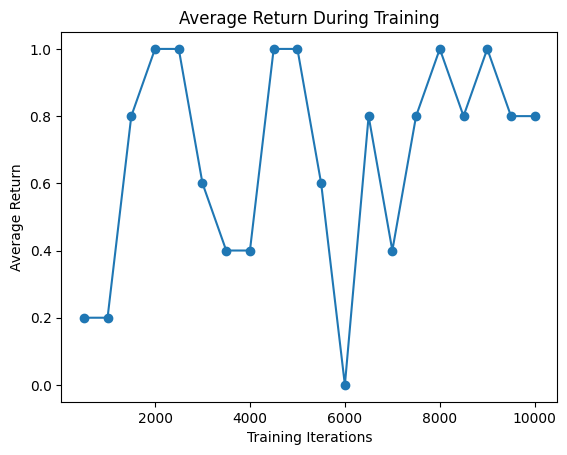

Agent marked X on position 1
You marked O on position 5
Agent marked X on position 1


ValueError: invalid literal for int() with base 10: ''

In [4]:
'''
You will be asked to enter number corresponding to the boards where you want to make your move, for example in 1 3x3 TicTacToe:
1 | 2 | 3
4 | 5 | 6
7 | 8 | 9
The model should train a 3x3 TicTacToe by default, you can definitely modify the values(of N, number of iterations etc) for your convenience but training model for bigger N might take lot of time
'''

# Code Here
env = TicTacToe()
agent = TDAgent(env)
agent.train(total_iterations=10000, evaluate_every=500)

policy = np.load('optimal_policy.npy')

state, _, done = env.reset()

while not done:

    agent_action = policy[agent.get_state_index(state)]
    print(f'Agent marked X on position {int(agent_action+1)}')
    state, reward, done = env.act(agent_action)

    if not done:

        user_action = int(input("Enter position where you wish to mark O: "))
        print(f'You marked O on position {user_action}')
        state, reward, done = env.act(user_action-1)

print(f'Game Over!', end = " ")

if reward == 1.0:
    print(f'Computer (X) wins.')
else:
    print(f'You (O) win.')
